#### Importing libraries

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


#### Import Dataset

In [141]:
sales_data=pd.read_csv("C:/Users/HP/Downloads/Sales_Data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Initial Inspection of Datset

##### Shape of dataset

In [143]:
sales_data.shape

(186850, 6)

##### Checking datatypes

In [145]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### DATA CLEANING

##### Checking Null values

In [147]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Similar number of values across all columns indicates that these are the number of rows with all values as null

<Axes: >

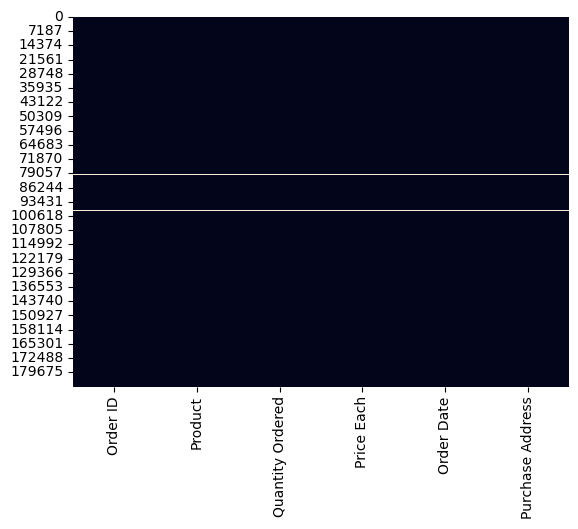

In [149]:
sns.heatmap(sales_data.isnull(), cbar=False)

#### Dropping All Null Values Rows

In [151]:
sales_data.dropna(how='all', inplace=True) 

In [153]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

All Null Values Removed!

#### Checking Duplicates

In [69]:
#sales_data[sales_data.duplicated()]  #Row level duplicates
sales_data.duplicated().sum()

618

There are 618 duplicated rows that needs to be removed

##### Dropping Duplicated Rows

In [155]:
sales_data = sales_data.drop_duplicates()

In [157]:
sales_data.duplicated().sum()

0

##### All duplicated rows are removed, keeping only the first occurances

##### Checking any invalid inputs in data (value entered with name of column)

In [159]:
invalid_rows=sales_data[sales_data['Order Date']=='Order Date']
invalid_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Drop row with invalid input

In [161]:
sales_data.drop(519, axis = 0, inplace = True)


#### Updating datatypes 

Order Date column from object to datetimem

In [163]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%m/%d/%y %H:%M')

Quantity Ordered and Price Each column from object to numeric

In [165]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])

sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

In [167]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


## Feature Engineering

Transform new columns useful for analysis 

**Sales Column (Price * Qty Orderd)**

In [171]:
sales_data['Sales'] = sales_data["Quantity Ordered"] * sales_data["Price Each"]


In [175]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


**Extract Month, Day, Hour, Minute columns from Order date**

In [187]:
from datetime import date
from datetime import datetime

In [189]:
# Abbreviated month names (Jan, Feb, etc.)
sales_data['Month'] = sales_data['Order Date'].dt.strftime('%b')

# Abbreviated day names (Mon, Tue, etc.)
sales_data['Day'] = sales_data['Order Date'].dt.strftime('%a')

# Hour 
sales_data['Hour'] = sales_data['Order Date'].dt.hour

#Minute
sales_data['Minute'] = sales_data['Order Date'].dt.minute


In [191]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Day,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Apr,Fri,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Apr,Sun,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr,Fri,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr,Fri,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Apr,Tue,9,27


**Extracting City and State from Purchase Address Column**


In [194]:
sales_data['City'] = sales_data['Purchase Address'].str.split(',').str[1].str.strip()

In [196]:
sales_data['State'] = sales_data['Purchase Address'].str.split(',').str[2].str.strip().str.split(' ').str[0]

In [199]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Day,Hour,Minute,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Apr,Fri,8,46,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Apr,Sun,22,30,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr,Fri,14,38,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr,Fri,14,38,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Apr,Tue,9,27,Los Angeles,CA


## DATA EXPLORATION

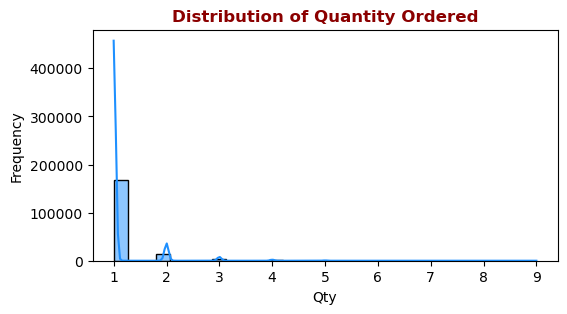

In [320]:
plt.figure(figsize=(6, 3))
sns.histplot(sales_data['Quantity Ordered'], kde=True, bins=30, color='dodgerblue')

# Title and other settings
plt.title('Distribution of Quantity Ordered', fontsize=12, fontweight='bold', color='darkred')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


In [314]:
Qty_counts= sales_data['Quantity Ordered'].value_counts().reset_index()
Qty_counts.columns = ['Quantity Ordered', 'Count']
Qty_1_counts = Qty_counts[Qty_counts['Quantity Ordered'] ==1]


In [316]:
percentage_1_Qty = (Qty_1_counts['Count'].sum() / Qty_counts['Count'].sum()) * 100
print(f"Percentage of orders with Qty 1: {percentage_1_Qty:.2f}%")

Percentage of orders with Qty 1: 90.63%


**90% of the orders are with 1 quantity ordered**

**indication to increase sales quantity per order by offering promotions like discount on other purchase or free shipping over certain value**

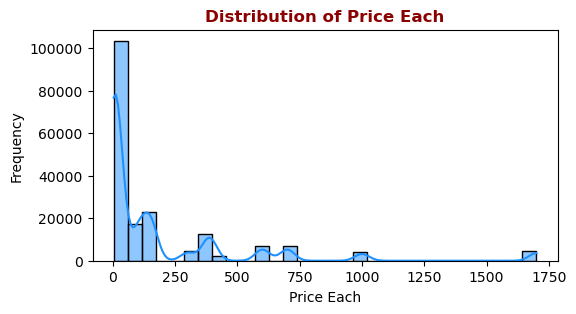

In [328]:
plt.figure(figsize=(6, 3))
sns.histplot(sales_data['Price Each'], kde=True, bins=30, color='dodgerblue')

# Title and other settings
plt.title('Distribution of Price Each', fontsize=12, fontweight='bold', color='darkred')
plt.xlabel('Price Each')
plt.ylabel('Frequency')
plt.show()


### Frequency Distribution of Prices

In [358]:
# Define bins and labels
bins = [0, 250, 500, 1000, float('inf')]
labels = ['<=250', '251–500', '501–1000', '>1000']

# Cut the data and get counts
price_counts = pd.cut(sales_data['Price Each'], bins=bins, labels=labels)

# Count and calculate percentage
summary_p = price_counts.value_counts().sort_index().reset_index()
summary_p.columns = ['Price Range', 'Count']
summary_p['Percentage'] = (summary_p['Count'] / summary_p['Count'].sum()) * 100

summary_p_df=pd.DataFrame(summary_p)

# Display the summary
display(summary_p_df[['Price Range','Percentage']])


,Price Range,Percentage
0,<=250,77.500188
1,251–500,10.371272
2,501–1000,9.586075
3,>1000,2.542464


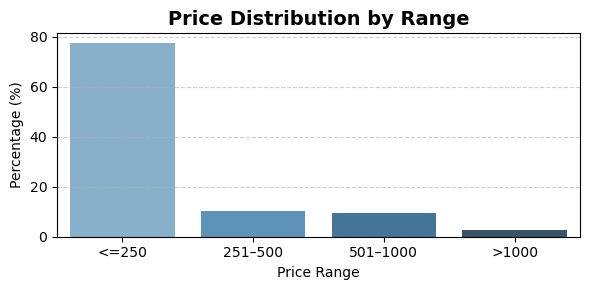

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.barplot(data=summary_p_df, x='Price Range', y='Percentage', palette='Blues_d')
plt.title('Price Distribution by Range', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.xlabel('Price Range')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Cumulative Frequency Distribution of Prices

In [363]:
# Recalculate price counts fresh to avoid previous conflicts
price_counts_summary = sales_data['Price Each'].value_counts().reset_index()
price_counts_summary.columns = ['Price Each', 'Count']

# Total count for percentage calculation
total_count = price_counts_summary['Count'].sum()

# Define thresholds
thresholds = [250, 500, 1000]
price_range_summary = []

# Loop through thresholds
for threshold in thresholds:
    count = price_counts_summary[price_counts_summary['Price Each'] <= threshold]['Count'].sum()
    percentage = (count / total_count) * 100
    price_range_summary.append({'Price Range': f'<= {threshold}', 'Count': count, 'Percentage': f'{percentage:.2f}%'})

# Handle the above 1000 range
above_1000_count = price_counts_summary[price_counts_summary['Price Each'] > 1000]['Count'].sum()
above_1000_percentage = (above_1000_count / total_count) * 100
price_range_summary.append({'Price Range': '> 1000', 'Count': above_1000_count, 'Percentage': f'{above_1000_percentage:.2f}%'})

# Convert to DataFrame
summary_df = pd.DataFrame(price_range_summary)

# Display the final summary
display(summary_df[['Price Range','Percentage' ]])


,Price Range,Percentage
0,<= 250,77.50%
1,<= 500,87.87%
2,<= 1000,97.46%
3,> 1000,2.54%


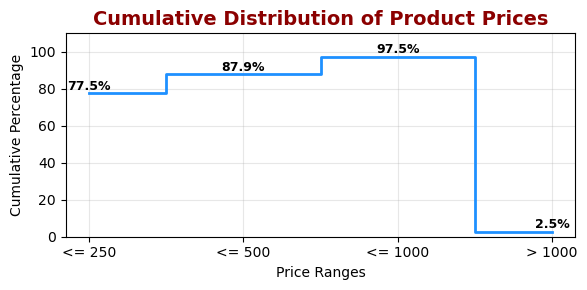

In [378]:
plt.figure(figsize=(6, 3))
plt.step(summary_df['Price Range'], summary_df['Percentage'], where='mid', color='dodgerblue', linewidth=2)

# Add data labels
for i, perc in enumerate(summary_df['Percentage']):
    plt.text(i, perc + 2, f'{perc:.1f}%', ha='center', fontsize=9, fontweight='bold')

plt.title('Cumulative Distribution of Product Prices', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('Price Ranges', fontsize=10)
plt.ylabel('Cumulative Percentage', fontsize=10)
plt.ylim(0, 110)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**87.87% of data in price each column contain values under 500, that means very few proportion of data belongs to order of high value products above 500**

**Bivariate & Multivariate Analysis**

### Monthly Sales

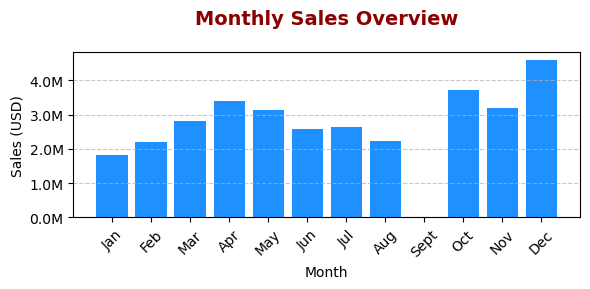

In [389]:

# Step 1: Define proper month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Step 2: Ensure 'Month' column is categorical with proper order
sales_data['Month'] = pd.Categorical(sales_data['Month'], categories=month_order, ordered=True)

# Step 3: Group and sort by index (which now respects calendar order)
Monthly_Sales = sales_data.groupby('Month')[['Sales']].sum().sort_index()

# Step 4: Plotting
plt.figure(figsize=(6 ,3))
plt.bar(Monthly_Sales.index, Monthly_Sales['Sales'], color='dodgerblue')

plt.title('Monthly Sales Overview', fontsize=14, fontweight='bold', color='darkred', pad=20)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Sales (USD)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis in millions 
formatter = FuncFormatter(lambda y, pos: f'{y/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


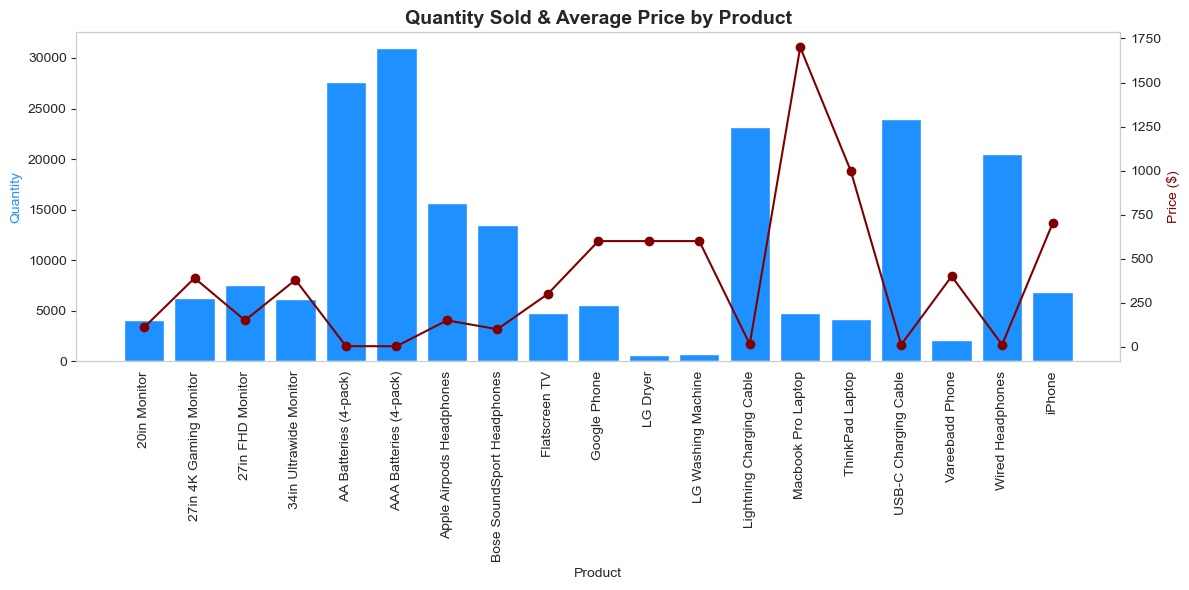

In [474]:
# Group and prepare data
product_group = sales_data.groupby('Product')
qty = product_group['Quantity Ordered'].sum()
price = product_group['Price Each'].mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Bar and line chart
ax1.bar(qty.index, qty, color='dodgerblue')
ax2.plot(price.index, price, color='maroon', marker='o')

# Labels and title
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity', color='dodgerblue')
ax2.set_ylabel('Price ($)', color='maroon')
ax1.set_xticklabels(qty.index, rotation=90, fontsize=10)
plt.title('Quantity Sold & Average Price by Product', fontsize=14, fontweight='bold')


# Remove grid lines
ax1.grid(False)
ax2.grid(False)


plt.tight_layout()
plt.show()


Negative correlation between price & Qty.

For low priced products the quantity is high while for high priced products quantity sold is very low

Highest Qty Sold -- Batteries (4 pack) -- having lowest price among all products

Macbook pro & thinkpad laptops having the highest and second highest price and I phone 3rd highest price. (their sales in any region would right skew the sales data)

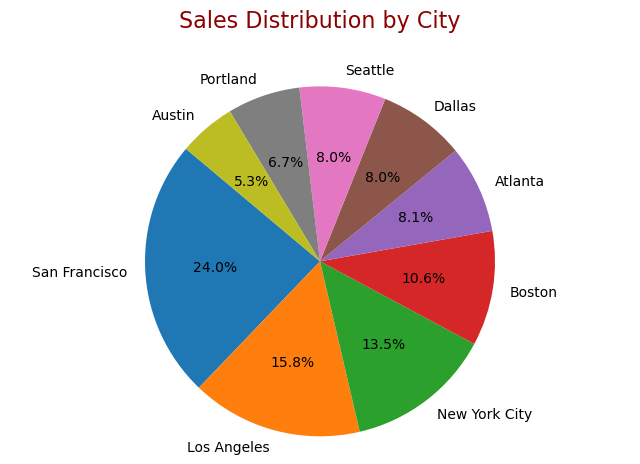

In [393]:
# Group sales data by City
city_sales = sales_data.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 5))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by City', fontsize=16, loc='center', color='darkred', pad=30)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


San fracisco has the highest sales while Austin being the lowest

investigate reasons -- either teh high priced products are being sold in San fransico while low priced products in Austin

Now Ananlyze product wise sales in each city

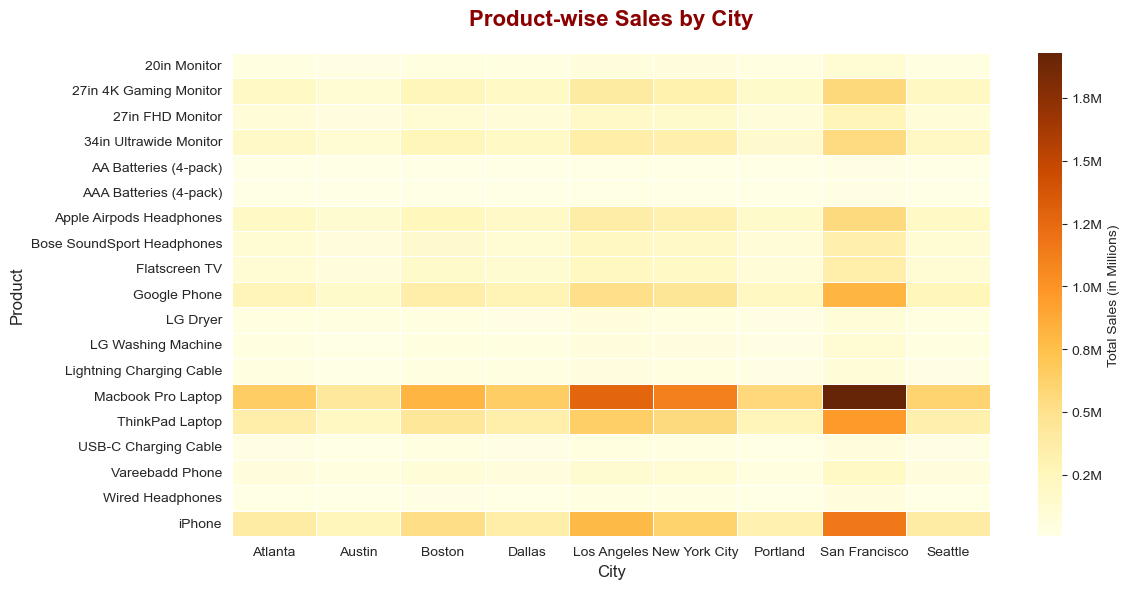

In [461]:
# Create pivot table: Product vs City
product_city_pivot = sales_data.pivot_table(index='Product', columns='City', values='Sales', aggfunc='sum')


# Create heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(product_city_pivot, annot=False, fmt='', cmap='YlOrBr', linewidths=0.5, cbar_kws={'label': 'Total Sales (in Millions)'}, annot_kws={"fontsize": 9}
)

# Format colorbar in millions
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))

# Titles and labels
plt.title('Product-wise Sales by City', fontsize=16, fontweight='bold', color='darkred', pad=20)
plt.xlabel('City', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.tight_layout()
plt.show()


San francisco has the highest share of sales due to all high priced products being sold there relatively more than other cities followed by Los Angeles and New York

Laptops and Phones (high priced products) are mainly being sold in three cities (san francisco, Los Angeles, and New york) --
Expand their sales to other cities

Monitor, dryers and Washing Machine sales should be focused on to increase market share due to high pricing.

Offer discounts and promotional offers.

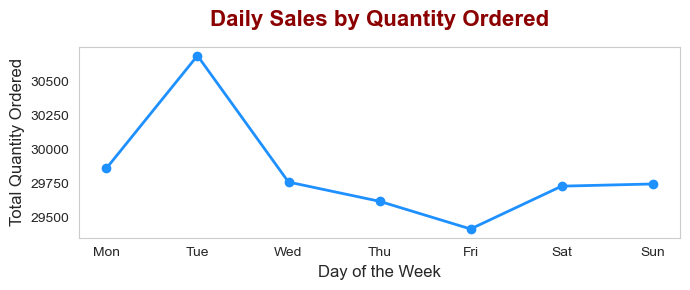

In [497]:


# Group data by Day and sum the Quantity Ordered
daily_sales = sales_data.groupby('Day')['Quantity Ordered'].sum().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

# Plotting
plt.figure(figsize=(7, 3))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='dodgerblue', linewidth=2)

# Title and labels
plt.title('Daily Sales by Quantity Ordered', fontsize=16, fontweight='bold', color='darkred', pad=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Quantity Ordered', fontsize=12)

# Clean aesthetics
plt.grid(False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


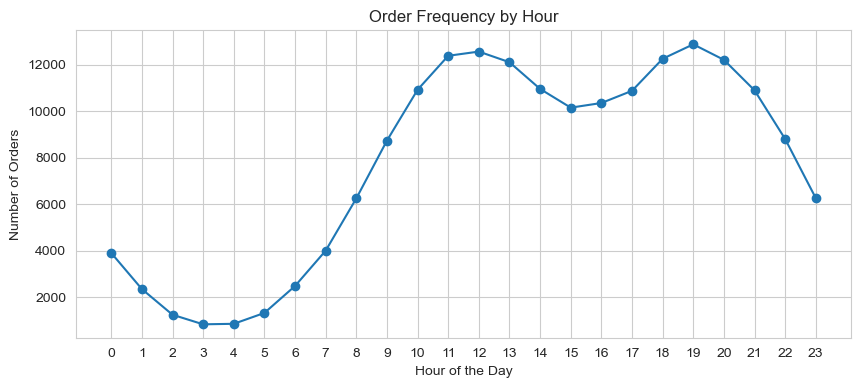

In [499]:
# Grouping by 'Hour' and counting number of orders per hour
hourly_counts = sales_data.groupby('Hour').size()

# Extract hours for x-axis
keys = hourly_counts.index

# Plotting
plt.figure(figsize=(10,4))
plt.plot(keys, hourly_counts.values,  marker='o')
plt.xticks(keys)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Hour')

plt.show()


from 10:am to 9:pm orders are recorded to be at peak. 

Advertise during these hours to maximize sales.